In [3]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.3
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bi

In [18]:
!pip install tfx
!pip install jupyter scikit-learn tensorflow tfx

  Using cached jupyter-1.0.0-py2.py3-none-any.whl (2.7 kB)
  Using cached qtconsole-5.5.1-py3-none-any.whl (123 kB)
  Using cached QtPy-2.4.1-py3-none-any.whl (93 kB)


In [1]:
!pip install --upgrade shapely

In [2]:
import tfx
print(tfx.__version__)

1.14.0


# Penjelasan Lanjutan Komponen ExampleGen

Dapat diketahui bahwa ExampleGen juga dapat digunakan untuk melakukan proses data ingestion untuk format data lain, seperti TFRecord. Selain itu, ia juga dapat melakukan proses data ingestion langsung dari cloud storage ataupun data warehouse seperti  Google Cloud BigQuery (https://cloud.google.com/bigquery).

- **TFRecord Files**

  Jika data yang digunakan dalam format TFRecord file, dapat dilakukan proses data ingestion menggunakan komponen **ImportExampleGen**.

In [3]:
from tfx.components import ImportExampleGen

example_gen = ImportExampleGen(input_base="tfrecord_dir")

- **Cloud Storage**

  Di industri, kita sering kali menyimpan data dalam cloud storage, seperti Google Cloud Storage, AWS Simple Storage Service (S3), dll. Komponen ExampleGen memungkinkan untuk melakukan proses data ingestion langsung dari cloud storage dengan mendefinisikan bucket path pada parameter input_base.

  Perlu diingat bahwa untuk mengakses private cloud storage, diperlukan untuk mengatur cloud provider credentials terlebih dahulu. Jika menggunakan AWS S3, kita perlu membuat access keyuntuk mengakses storage bucket. Namun, apabila menggunakan Google Cloud Storage, diharuskan untuk mengatur Google Cloud credential untuk mengakses storage bucket.

In [4]:
from tfx.components import CsvExampleGen

example_gen = CsvExampleGen(input_base="gs://bucket_path/")

- **Google Cloud BigQuery**

 Google Cloud BigQuery merupakan salah satu service data warehouse dari GCP . Komponen BigQueryExampleGen dapat digunakan untuk melakukan proses data ingestion dari Google Cloud BigQuery. Ketika menjalankan komponen tersebut, diharuskan untuk mengatur Google Cloud credential terlebih dahulu.

In [1]:
# !pip uninstall shapely
# !pip uninstall geos
# !pip install shapely

In [2]:
# !pip install --upgrade shapely geos

In [3]:
# !pip show shapely
# !pip install --upgrade geos

In [4]:
# # Mencoba melakukan autentikasi ke layanan Google Cloud
# from google.cloud import bigquery

# # Inisialisasi client BigQuery
# client = bigquery.Client()

# # Cek apakah autentikasi berhasil
# datasets = list(client.list_datasets())
# if datasets:
#     print("Autentikasi berhasil. Daftar dataset BigQuery:")
#     for dataset in datasets:
#         print(f"- {dataset.dataset_id}")
# else:
#     print("Autentikasi gagal. Pastikan variabel lingkungan GOOGLE_APPLICATION_CREDENTIALS sudah diatur dengan benar.")

In [5]:
# from google.colab import files

# # Import dataset
# uploaded = files.upload()

In [6]:
# # Setel Variabel Lingkungan GOOGLE_APPLICATION_CREDENTIALS
# import os
# os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "credentials.json"

# # Tampilkan nilai variabel lingkungan GOOGLE_APPLICATION_CREDENTIALS
# print(os.environ["GOOGLE_APPLICATION_CREDENTIALS"])

In [7]:
# import os
# from tfx.extensions.google_cloud_big_query.example_gen.component import BigQueryExampleGen

# # Mengatur Google Cloud credential
# os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "credential_file.json"

# query = "SELECT * FROM <project_id>.<database>.<table_name>"
# example_gen = BigQueryExampleGen(query=query)

Komponen ExampleGen juga memungkinkan kita untuk melakukan beberapa tahapan data preparation yang sedikit lebih kompleks seperti berikut.

- **Melakukan data splitting menggunakan subdirectory**

  Terkadang dataset yang kita gunakan telah dibagi ke dalam beberapa subdirectory. Sebagai contoh, katakanlah kita memiliki dataset dengan subdirectory sebagai berikut.

    └── data
    ├── train
    │   └─ iris-training.csv
    ├── eval
    │   └─ iris-eval.csv
    └── test
        └─ iris-test.csv

Pada kasus ini, kita perlu mengatur konfigurasi inputan menggunakan parameter **input_config**.

    import os
    from tfx.proto import example_gen_pb2
    from tfx.components import CsvExampleGen
    from tfx.orchestration.experimental.interactive.interactive_context import InteractiveContext

    # Inisialisasi InteractiveContext
    context = InteractiveContext()

    # Konfigurasi input untuk CsvExampleGen
    input_base = os.path.join(os.getcwd(), 'data')
    input_config = example_gen_pb2.Input(splits=[
        example_gen_pb2.Input.Split(name='train', pattern='train/*'),
        example_gen_pb2.Input.Split(name='eval', pattern='eval/*'),
        example_gen_pb2.Input.Split(name='test', pattern='test/*')
    ])

    # Membuat instance CsvExampleGen
    example_gen = CsvExampleGen(input_base=input_base, input_config=input_config)

    # Menjalankan CsvExampleGen
    context.run(example_gen)

In [39]:
# !pip install tensorflow tensorflow-data-validation tensorflow-transform tfx

- **Spanning Datasets**

  Pada proses pengembangan pipeline machine learning, umumnya menggunakan beberapa versi dataset. Komponen ExampleGen akan mengelompokkan dataset berdasarkan versinya menggunakan konsep span.

  Kita dapat menganggap span sebagai sebuah snapshot dari suatu data. Setiap proses ETL atau data cleaning akan menghasilkan versi span yang baru. Secara default, ExampleGen akan menggunakan versi terbaru dari suatu span.



  Jika data yang digunakan terdapat pada filesystem, setiap span akan dipisah ke dalam beberapa directory. Berikut contoh pemisahan data berdasarkan spannya.

              └── data
              ├── export-0
              │ ├── train
              │ │ └─ 20k-iris-training.csv
              │ └── eval
              │ └─ 2k-iris-eval.csv
              ├── export-1
              │ ├── train
              │ │ └─ 24k-iris-training.csv
              │ └── eval
              │ └─ 3k-iris-eval.csv
              └── export-2
              ├── train
              │ └─ 26k-iris-training.csv
              └── eval
                └─ 4k-iris-eval.csv

Pada bagian konfigurasi inputan, kita dapat menggunakan parameter **{SPAN}** untuk menampung versi span. Parameter ini merepresentasikan nilai (0, 1, 2, …) sesuai struktur folder di atas.

    input = example_gen_pb2.Input(splits=[
        example_gen_pb2.Input.Split(name='train', pattern='export-{SPAN}/train/*'),
        example_gen_pb2.Input.Split(name='eval', pattern='export-{SPAN}/eval/*')
    ])
    
    example_gen = CsvExampleGen(input_base="data", input_config=input)
    context.run(example_gen)

# Best Practice Penggunaan TFT

Menurut Hapke dan Nelson dalam buku yang berjudul “Building Machine Learning Pipelines”, terdapat empat best practice yang perlu kita terapkan ketika melakukan preprocessing menggunakan TFT. Berikut keempat best practice tersebut.

1. Nama fitur harus merepresentasi proses transformasi yang terjadi dan nama fitur sebelumnya. Seperti contoh, katakanlah kita menggunakan nama y_normalized untuk menampung fitur y yang telah dinormalisasi. Kita juga bisa memberi tambahan “_xf” pada nama fitur setelah ditransformasi (ex: y_xf). Selain itu, kita juga harus memastikan bahwa nama fitur yang akan dimasukkan ke dalam model harus sama dengan fitur keluaran dari preprocessing_fn().

2. Tipe data dari fitur yang akan digunakan harus sesuai dengan tipe data yang diterima model. TFT sendiri membatasi tipe data untuk fitur keluaran ke dalam tiga tipe: tf.string, tf.float32, dan tf.int64.

3. Pastikan input dan output dari preprocessing_fn() berupa Tensor atau SparseTensor. Hal ini sangat penting karena TFT akan melakukan preprocessing secara batch.

4. Cukup gunakan operasi TensorFlow untuk memproses raw data menjadi transformed data. Sebagai contoh, untuk mengubah sebuah string ke dalam bentuk lower case letters (huruf kecil), kita harus menggunakan tf.string.lower().

Selain keempat best practice di atas, kita juga harus memperhatikan permasalahan dan jenis data yang kita hadapi. Hal ini karena tahapan preprocessing sangat dipengaruhi oleh jenis data yang digunakan. Sebagai contoh, preprocessing untuk jenis data image tentunya berbeda dengan tahapan preprocessing untuk jenis data text.

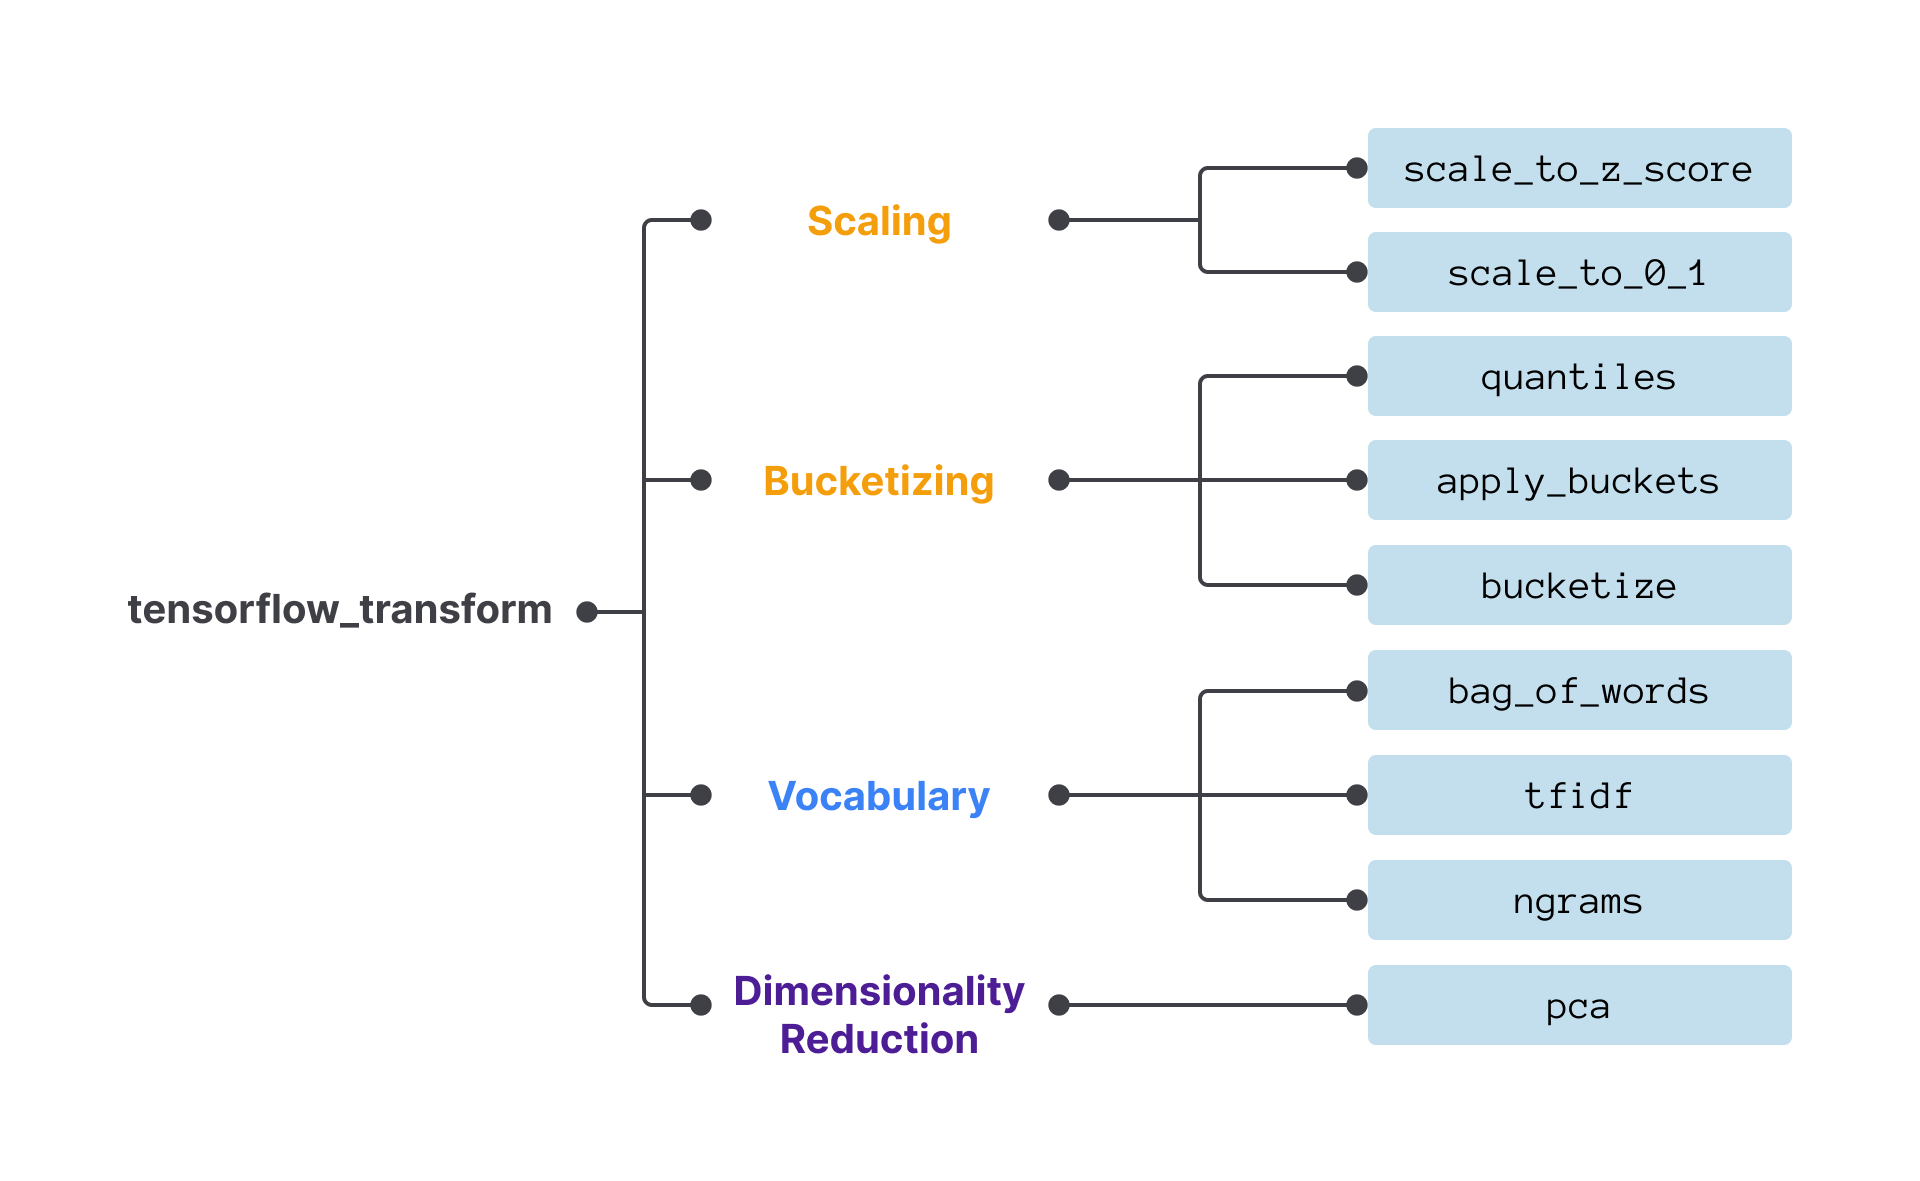

Jika pada contoh sebelumnya kita telah melakukan preprocessing untuk jenis data tabular yang berisi data numerik, pada bagian ini kita akan sedikit membahas strategi preprocessing untuk jenis data lain. Berikut beberapa strategi yang bisa kita gunakan ketika melakukan preprocessing untuk jenis data image dan text.

- Text data

  TFT memiliki beberapa fungsi bawaan yang bisa Anda gunakan untuk melakukan preprocessing untuk jenis data text.

    - tft.compute_and_apply_vocabulary(): fungsi ini membuat sebuah vocabulary yang menghubungkan sebuah string dengan suatu integer.

    - tft.ngrams(): fungsi ini menerima input berupa berupa token dengan tipe data SparseTensor. Selanjutnya fungsi ini akan menghasilkan sebuah SparseTensor yang berisi n-grams.

    - tft.bag_of_words(): fungsi ini akan menghasilkan sebuah vektor bag-of-wards berdasarkan n-grams.

    - tft.tfidf(): fungsi ini akan melakukan proses TFIDF.


In [41]:
def preprocessing_fn(inputs):
  s = inputs['s']

  s_integerized = tft.compute_and_apply_vocabulary(s)

  return {
      's_integerized': s_integerized
  }

Selain menggunakan fungsi bawaan dari TFT, Anda juga dapat menggunakan fungsi yang disediakan oleh library TensorFlow Text. Library ini menyediakan banyak fungsi yang dapat membantu Anda melakukan preprocessing pada data text.

- Image data

  Apabila Anda bekerja dengan data image, TensorFlow telah menyediakan beberapa fungsi bawaan yang bisa digunakan untuk melakukan preprocessing pada image. Secara garis besar, fungsi tersebut dapat dibagi menjadi dua, yaitu operasi tf.image dan tf.io.

  tf.image menyediakan beberapa fungsi yang dapat digunakan untuk memanipulasi image seperti resize, convert color, image transformation, dll. Di sisi lain, fungsi yang ada pada tf.io umumnya digunakan untuk melakukan dekode gambar menjadi bentuk tensor.


Berikut contoh preprocessing function untuk jenis data image.

In [42]:
def preprocessing_fn(raw_image):
  raw_image = tf.reshape(raw_image, [-1])

  image_rgb = tf.io.decode_jpeg(raw_image, channels=3)
  image_gray = tf.image.rgb_to_grayscale(image_rgb)

  image = tf.image.convert_image_dtype(image_gray, tf.float32)
  resized_image = tf.image.resize_with_pad(
      image,
      target_height=150,
      target_with=150
  )

  return tf.reshape(resized_image, [-1, 150, 150, 1])